# Bitwise Operations includes AND, OR, NOT and XOR

Original Images:


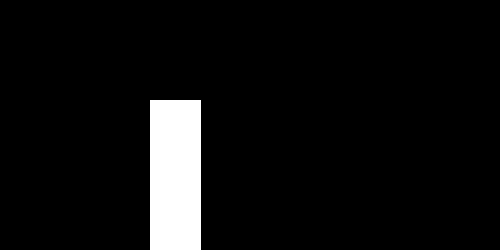

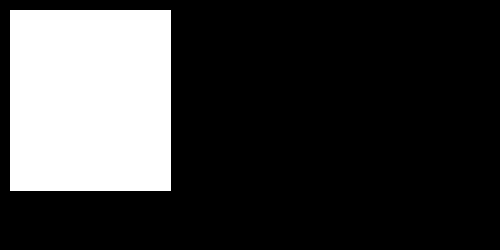


Bitwise AND Result:


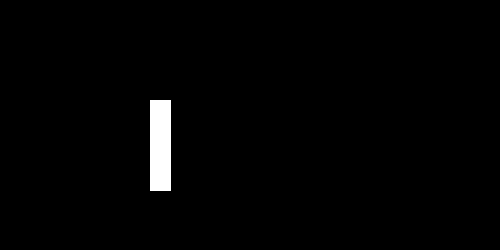


Bitwise OR Result:


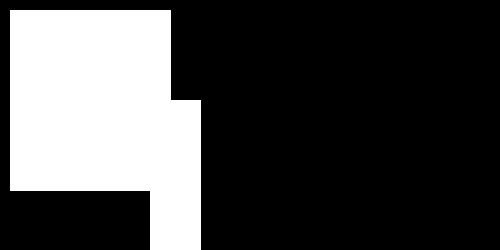


Bitwise XOR Result:


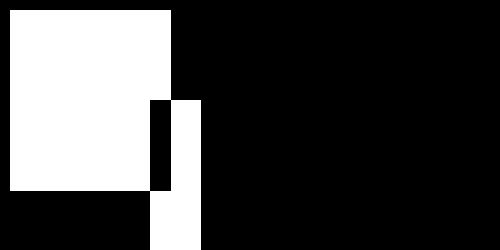


Bitwise NOT Result on img1:


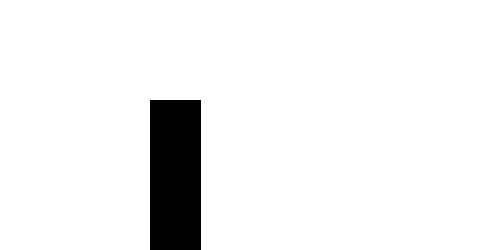


Bitwise NOT Result on img2:


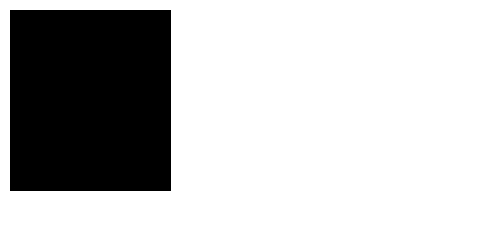

In [ ]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import numpy as np

# Create two black images and draw white rectangles on them
img1 = np.zeros((250, 500, 3), np.uint8)
img1 = cv2.rectangle(img1, (150, 100), (200, 250), (255, 255, 255), -1)
img2 = np.zeros((250, 500, 3), np.uint8)
img2 = cv2.rectangle(img2, (10, 10), (170, 190), (255, 255, 255), -1)

# Perform bitwise operations
bitAnd = cv2.bitwise_and(img2, img1)
bitOr = cv2.bitwise_or(img2, img1)
bitXor = cv2.bitwise_xor(img1, img2)
bitNot1 = cv2.bitwise_not(img1)
bitNot2 = cv2.bitwise_not(img2)

# Display images
print("Original Images:")
cv2_imshow(img1)
cv2_imshow(img2)

print("\nBitwise AND Result:")
cv2_imshow(bitAnd)

print("\nBitwise OR Result:")
cv2_imshow(bitOr)

print("\nBitwise XOR Result:")
cv2_imshow(bitXor)

print("\nBitwise NOT Result on img1:")
cv2_imshow(bitNot1)

print("\nBitwise NOT Result on img2:")
cv2_imshow(bitNot2)


# **Object Tracking in Image by using HSV**

1.HSV -  Hue saturation value

2.Hsv is use to separate image information on the basis of color luminous or intensity.

3.We use Hsv where we perform operation on the basis of color.

4.HSV related to hexaon color model

5.H - hue - use to select color from 360 portion

6.staturation is amount of color  which is selected in hue.(color shades)

7.V -value which is brightness of the color.


Original Frame:


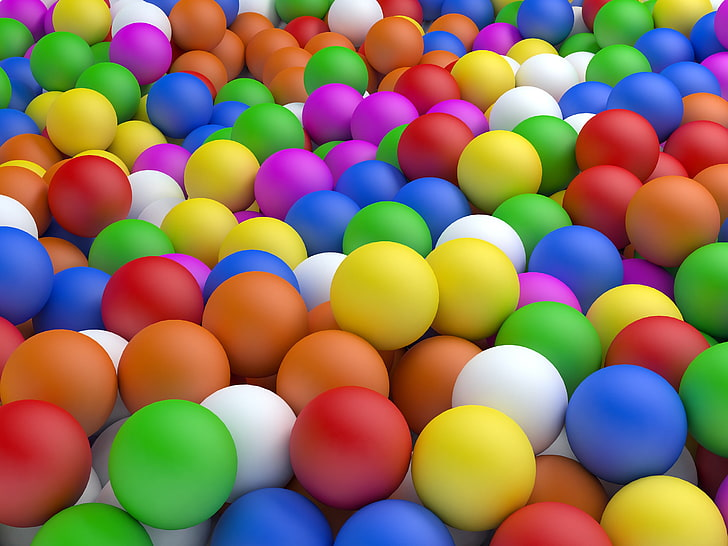

Mask:


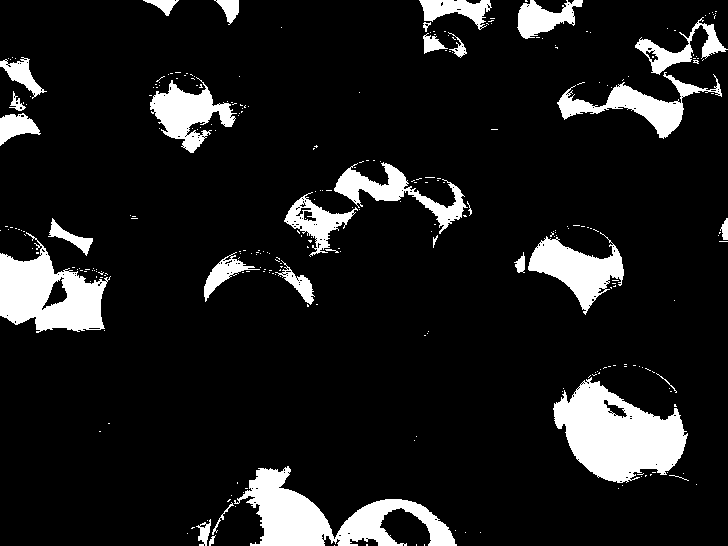

Filtered Result:


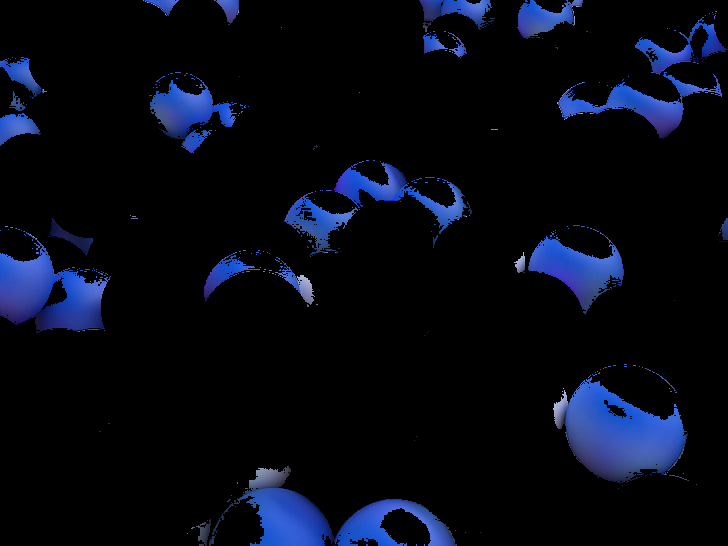

In [5]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import numpy as np

# Load the image
frame = cv2.imread('/content/balls.jpg')  # Use the correct path
if frame is None:
    print("Error: Could not load image. Check the file path.")
else:
    # Convert to HSV color space
    hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

    # Define HSV range for color filtering (blue in this case)
    l_v = np.array([110, 50, 50])
    u_v = np.array([130, 235, 225])

    # Create a mask using the defined range
    mask = cv2.inRange(hsv, l_v, u_v)

    # Apply mask to the image
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Display the images using cv2_imshow
    print("Original Frame:")
    cv2_imshow(frame)

    print("Mask:")
    cv2_imshow(mask)

    print("Filtered Result:")
    cv2_imshow(res)


# **Object Tracking in Image using OpenCV.**

1.import ipywidgets as widgets: Imports the ipywidgets library for creating interactive sliders and UI elements in Jupyter notebooks or Colab.

2.from IPython.display import display, clear_output: Imports functions to display widgets and clear previous outputs, allowing for real-time updates when sliders are adjusted.

In [1]:
import cv2
from google.colab.patches import cv2_imshow  # For displaying images in Colab
import numpy as np
import ipywidgets as widgets
from IPython.display import display, clear_output

# Load and resize the image
frame = cv2.imread('/content/balls.jpg')
frame = cv2.resize(frame, (600, 400))

# Convert image to HSV once since the frame is static
hsv = cv2.cvtColor(frame, cv2.COLOR_BGR2HSV)

# Function to update the mask and result based on slider values
def update_mask(lower_h, lower_s, lower_v, upper_h, upper_s, upper_v):
    # Create HSV range based on slider values
    lower_bound = np.array([lower_h, lower_s, lower_v])
    upper_bound = np.array([upper_h, upper_s, upper_v])

    # Create mask and filter the image
    mask = cv2.inRange(hsv, lower_bound, upper_bound)
    res = cv2.bitwise_and(frame, frame, mask=mask)

    # Display images
    clear_output(wait=True)
    print("Original Frame:")
    cv2_imshow(frame)
    print("Mask:")
    cv2_imshow(mask)
    print("Filtered Result:")
    cv2_imshow(res)

# Create sliders for HSV values
lower_h = widgets.IntSlider(value=0, min=0, max=255, description='Lower H')
lower_s = widgets.IntSlider(value=0, min=0, max=255, description='Lower S')
lower_v = widgets.IntSlider(value=0, min=0, max=255, description='Lower V')
upper_h = widgets.IntSlider(value=255, min=0, max=255, description='Upper H')
upper_s = widgets.IntSlider(value=255, min=0, max=255, description='Upper S')
upper_v = widgets.IntSlider(value=255, min=0, max=255, description='Upper V')

# Arrange sliders in a vertical layout
ui = widgets.VBox([lower_h, lower_s, lower_v, upper_h, upper_s, upper_v])

# Output the function whenever a slider is adjusted
out = widgets.interactive_output(update_mask, {
    'lower_h': lower_h, 'lower_s': lower_s, 'lower_v': lower_v,
    'upper_h': upper_h, 'upper_s': upper_s, 'upper_v': upper_v
})

# Display UI and output
display(ui, out)


Output()